### Student Information
Name: Yvonne Chow Lork Yee

Student ID: 106065710

GitHub ID: YvonneLYee

---

# Part 1: Take Home Exercises

## Data Preparation

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
len(twenty_train.data)

2257

### Exercise 1

In [2]:
# Answer here
twenty_train.data[:3]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### Exercise 2 (Take home) 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Answer here
# sort by category (descending order)
X.sort_values(by = 'category', ascending=False)[0:10]

,text,category,category_name
1128,From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...,3,soc.religion.christian
540,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian
1474,From: xx155@yfn.ysu.edu (Family Magazine Sysop...,3,soc.religion.christian
1472,From: apodaca@spot.Colorado.EDU (mu'tafikah) S...,3,soc.religion.christian
546,From: mls@panix.com (Michael Siemon) Subject: ...,3,soc.religion.christian
1467,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,3,soc.religion.christian
1466,From: schnitzi@osceola.cs.ucf.edu (Mark Schnit...,3,soc.religion.christian
1465,From: REXLEX@fnal.fnal.gov Subject: Re: Assura...,3,soc.religion.christian
1462,From: khan0095@nova.gmi.edu (Mohammad Razi Kha...,3,soc.religion.christian
554,From: JEK@cu.nih.gov Subject: Chanting of the ...,3,soc.religion.christian


### Exercise 3
Try to fecth records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [4]:
# Answer here
#X[X['category_name'] == 'sci.med'].iloc[::10][0:5]
X.loc[lambda f:f.category_name == 'sci.med'].iloc[::10,:][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [5]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

### Exercise 5 (Take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer here:
In this case, .isnull function will only detect the datatype but not the contents in 'missing_example'. Therefore, in 0,1 and 4 it results true, while 2,3 and 5 results false because the datatype is boolean.

### Exercise 6 (Take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Answer here:
There's a new column named unigrams in the new X dataframe which previously do not have. Other than that, it remain unchanged.

### Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [8]:
X_sample = X.sample(n=1000)
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0,X_sample.category_name.value_counts().max()], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


### Exercise 8 (take home)
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
soc.religion.christian    282
sci.med                   252
comp.graphics             244
alt.atheism               222
Name: category_name, dtype: int64
                        X_count  X_sample_count
soc.religion.christian      599             282
sci.med                     594             252
comp.graphics               584             244
alt.atheism                 480             222


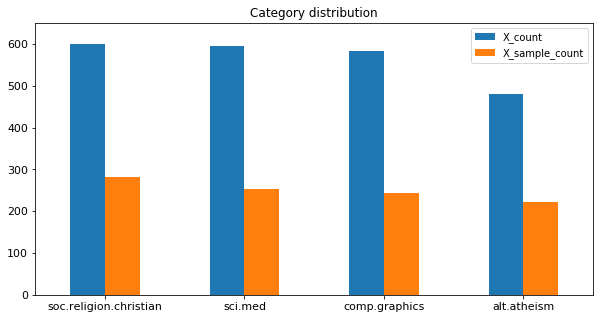

In [9]:
# Answer here
print(X.category_name.value_counts())
X_count = X.category_name.value_counts()
print(X_sample.category_name.value_counts())
X_sample_count = X_sample.category_name.value_counts()
index = ['soc.religion.christian','sci.med','comp.graphics','alt.atheism']

df = pd.DataFrame({'X_count': X_count,'X_sample_count': X_sample_count}, index = index)
print(df)
ax = df.plot.bar(title = 'Category distribution',
                 ylim = [0, 650],
                 rot = 0,
                 fontsize = 11,
                 figsize = (10,5))

### Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [10]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### Exercise 10 (Take home)
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
X_counts = count_vect.fit_transform(X.text)

# Answer here
X_counts[4:5,0:38].toarray()
count_vect.get_feature_names()[37]
#analyze(" ".join(list(X[4:5].text)))[37]

'01'

### Exercise 11 (Take home)
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

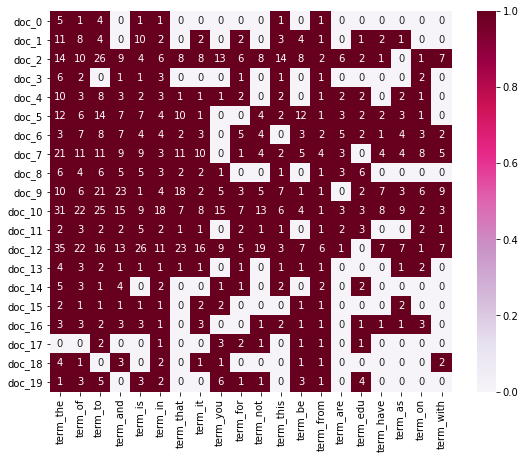

In [12]:
# Answer here
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the number of X_counts and sort them by getting only first 20 features
listsort = np.argsort(np.sum(X_counts, axis=0).tolist()[0])[::-1][0:20]
docindex = slice(0,20)
plot_x = ["term_"+ str (count_vect.get_feature_names()[i]) for i in listsort]
plot_y = ["doc_"+ str(i) for i in list(X.index)[docindex]]
plot_z = X_counts[docindex, listsort].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (9, 7))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

### Exercise 12 (Take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

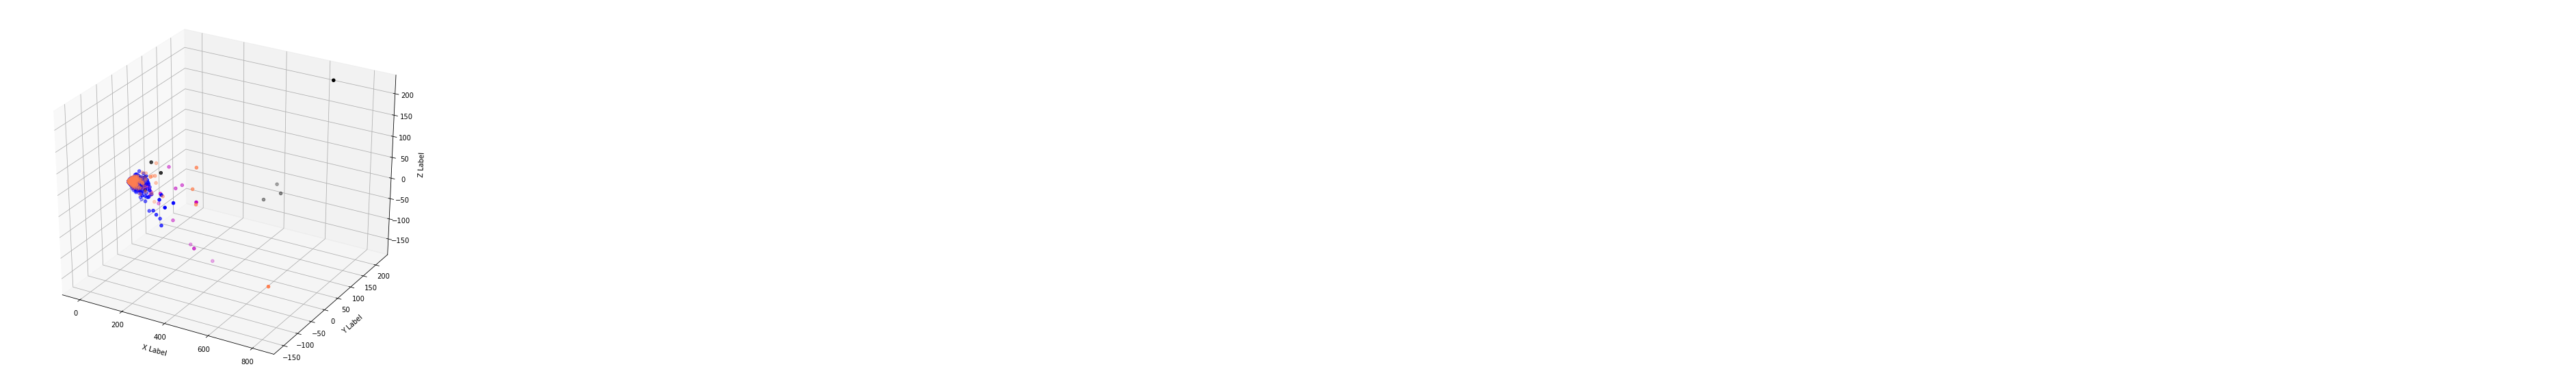

In [13]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,2,2, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name'] == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.25)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### Exercise 13 (Take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [14]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Plotly was implemented to make the plot become nicer interactive visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
            y = term_frequencies)]

py.iplot(data, filename = 'jupyter-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~YvonneChow/0 or inside your plot.ly account where it is named 'jupyter-bar'


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### Exercise 14 (Take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [15]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# The number of terms were reduced become 200 for a better visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
            y = term_frequencies[:200])]

py.iplot(data, filename = 'jupyter-bar-reduce')

The draw time for this plot will be slow for clients without much RAM.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### Exercise 15 (Take home)
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [16]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# The number of terms on x-axis were reduced become 200 and sorted by frequency instead of alphabetical order
bar = go.Bar(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = '#EB89B5'))
line = go.Scatter(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = 'magenta'))
data = [bar, line]
py.iplot(data, filename = 'jupyter-bar-longtail')

The draw time for this plot will be slow for all clients.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



# Part 2: New Dataset (Lab 1 Operations)

## Import library and Load data

In [17]:
### Begin Assignment Here!
# import library
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# my functions
import helpers.data_mining_helpers as dmh

# prepare dataset
amazon = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', sep = "\t",header = None)
imdb = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', sep = " \t",header = None)
yelp = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', sep = "\t",header = None)

amazon.columns = ['sentence','score']
imdb.columns = ['sentence','score']
yelp.columns = ['sentence','score']

data = [amazon, imdb, yelp]
result = pd.concat(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [18]:
len(result)

3000

In [19]:
result[:3]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [20]:
result[-10:]

,sentence,score
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [21]:
# sort by category (descending order)
result.sort_values(by = 'score', ascending = False)[0:10]

,sentence,score
500,The entire audience applauded at the conclusio...,1
342,The vegetables are so fresh and the sauce feel...,1
270,"It is an excellent drama, an excellent thrille...",1
269,"The attention given to every character, and co...",1
268,"It ranks highly as a great noir-crime-drama, i...",1
267,"One of the best mexican movies ever!, and one ...",1
266,Thanks good a movie like this was done and rel...,1
265,"All things considered, a job very well done.",1
264,And there wasn't a single sour note struck act...,1
263,"Conceptually, the show offers a little bit of ...",1


In [22]:
# group by category, then count the size of each category
result.groupby('score').size()

score
0    1500
1    1500
dtype: int64

## Check missing values

In [23]:
result.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [24]:
result.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [25]:
result.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [26]:
dummy_series = pd.Series(["dummy_record", 1], index = ["sentence", "score"])

In [27]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [28]:
result_with_series = result.append(dummy_series, ignore_index = True)

In [29]:
len(result_with_series)

3001

In [30]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [31]:
result.dropna(inplace=True)

In [32]:
result.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [33]:
len(result)

3000

## Check duplicate data

In [34]:
result.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 3000, dtype: bool

In [35]:
sum(result.duplicated())

17

In [36]:
sum(result.duplicated('sentence'))

17

In [37]:
result.drop_duplicates(inplace = True) # inplace applies changes directly on our dataframe

In [38]:
len(result)

2983

## Data Preprocessing
### 1. Sampling data

In [39]:
result_sample = result.sample(n=1000)

In [40]:
len(result_sample)

1000

In [41]:
result_sample[0:4]

,sentence,score
300,Sending it back.,0
23,I could care less... The interior is just beau...,1
429,These are the nicest restaurant owners I've ev...,1
768,PS the only scene in the movie that was cool i...,1


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
result.score

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: score, Length: 2983, dtype: int64

0    1493
1    1490
Name: score, dtype: int64


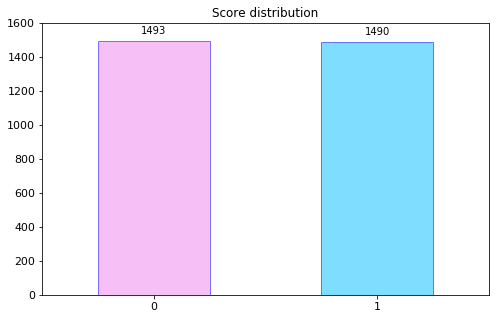

In [44]:
print(result.score.value_counts())

# plot barchart for result
import numpy as np
my_colors = 'violet','deepskyblue'
ax = result.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,5),
                                    color = my_colors,
                                    alpha = 0.5,
                                    edgecolor = 'blue')
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

0    502
1    498
Name: score, dtype: int64


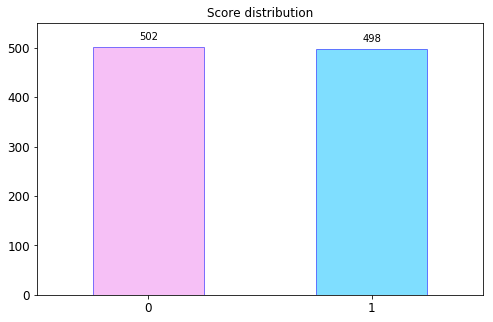

In [45]:
print(result_sample.score.value_counts())

# plot barchart for result_sample
my_colors = 'violet','deepskyblue'
ax = result_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 550], 
                                           rot = 0, fontsize = 12, figsize = (8,5),
                                           color = my_colors,
                                           alpha=0.5,
                                           edgecolor = 'blue')
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

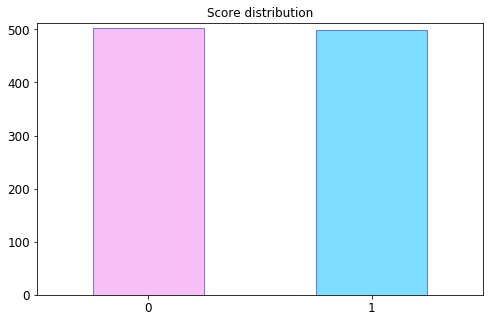

In [46]:
my_colors = 'violet','deepskyblue'
result_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0,result_sample.score.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,5),
                                           color = my_colors,
                                           alpha=0.5,
                                           edgecolor = 'blue')

0    1493
1    1490
Name: score, dtype: int64
0    502
1    498
Name: score, dtype: int64


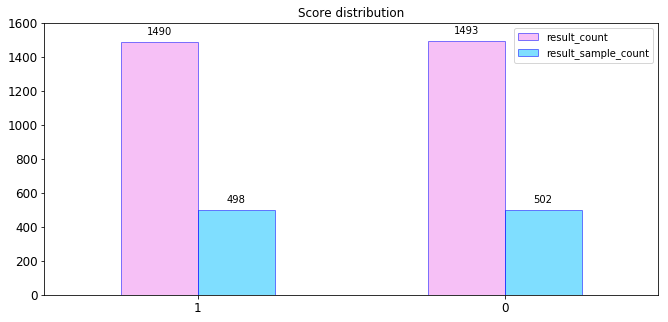

In [47]:
result_count = result.score.value_counts()
print(result_count)
result_sample_count = result_sample.score.value_counts()
print(result_sample_count)
index = [1, 0]
my_colors = 'violet','deepskyblue'
df = pd.DataFrame({'result_count': result_count,'result_sample_count': result_sample_count}, index = index)
ax = df.plot.bar(title = 'Score distribution',
                 ylim = [0, 1600],
                 rot = 0,
                 fontsize = 12,
                 figsize = (11,5),
                 color = my_colors,
                 alpha=0.5,
                 edgecolor = 'blue')
ax.legend(loc = 'upper right', frameon = True)
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

### 2. Feature Creation

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/LorkYee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# takes a like a minute or two to process
result['unigrams'] = result['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [50]:
result[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [51]:
result[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [52]:
list(result[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 3. Feature Subset Selection

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
result_counts = count_vect.fit_transform(result.sentence)

In [54]:
result_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [55]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(result[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [56]:
# We can check the shape of this matrix by:
result_counts.shape

(2983, 5155)

In [57]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [58]:
result[0:5]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [59]:
# we convert from sparse array to normal array
result_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [60]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[55:80]]

In [61]:
plot_x

['term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 'term_about',
 'term_above',
 'term_abroad',
 'term_absolute',
 'term_absolutel']

In [62]:
# obtain document index
plot_y = ["sent_"+ str(i) for i in list(result.index)[55:80]]
plot_z = result_counts[55:80, 55:80].toarray()
# plot_y
# plot_z

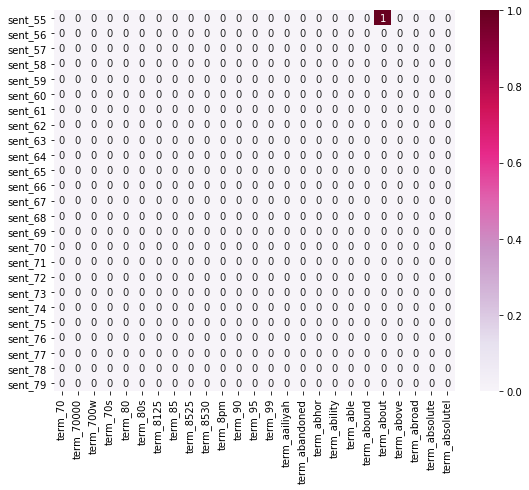

In [63]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

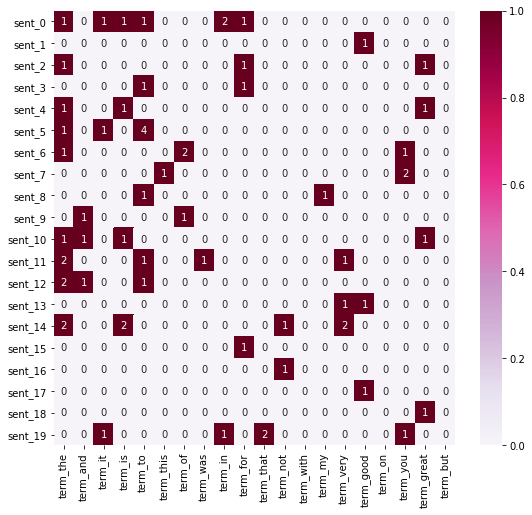

In [64]:
import seaborn as sns

# Mean the number of result_counts and sort them by getting only first 20 features
listsort = np.argsort(np.mean(result_counts, axis = 0).tolist()[0])[::-1][0:20]
docindex = slice(0,20)
plot_x = ["term_"+ str (count_vect.get_feature_names()[i]) for i in listsort]
plot_y = ["sent_"+ str(i) for i in list(result.index)[docindex]]
plot_z = result_counts[docindex, listsort].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (9, 8))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

### 4. Dimensionality Reduction

In [65]:
from sklearn.decomposition import PCA

In [66]:
result_reduced = PCA(n_components = 2).fit_transform(result_counts.toarray())
result_reduced.shape

(2983, 2)

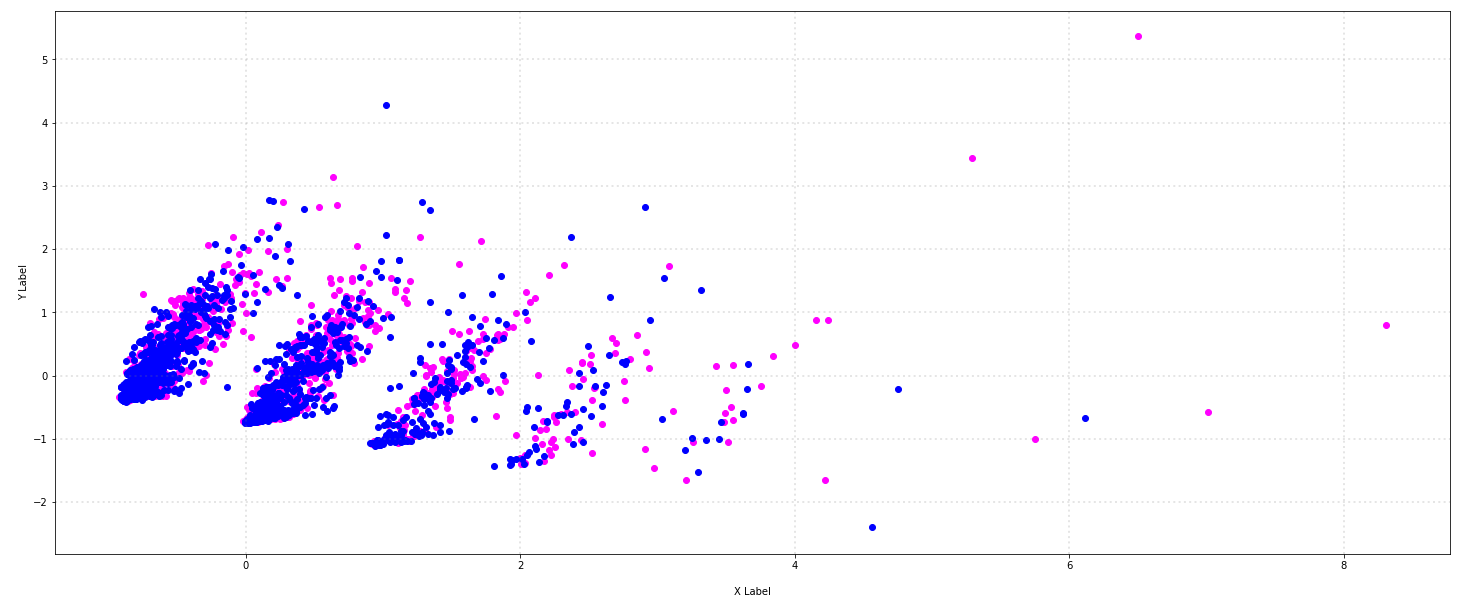

In [67]:
col = ['magenta', 'blue']
score = [1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scores in zip(col, score):
    xs = result_reduced[result['score'] == scores].T[0]
    ys = result_reduced[result['score'] == scores].T[1]
   
    ax.scatter(xs, ys, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

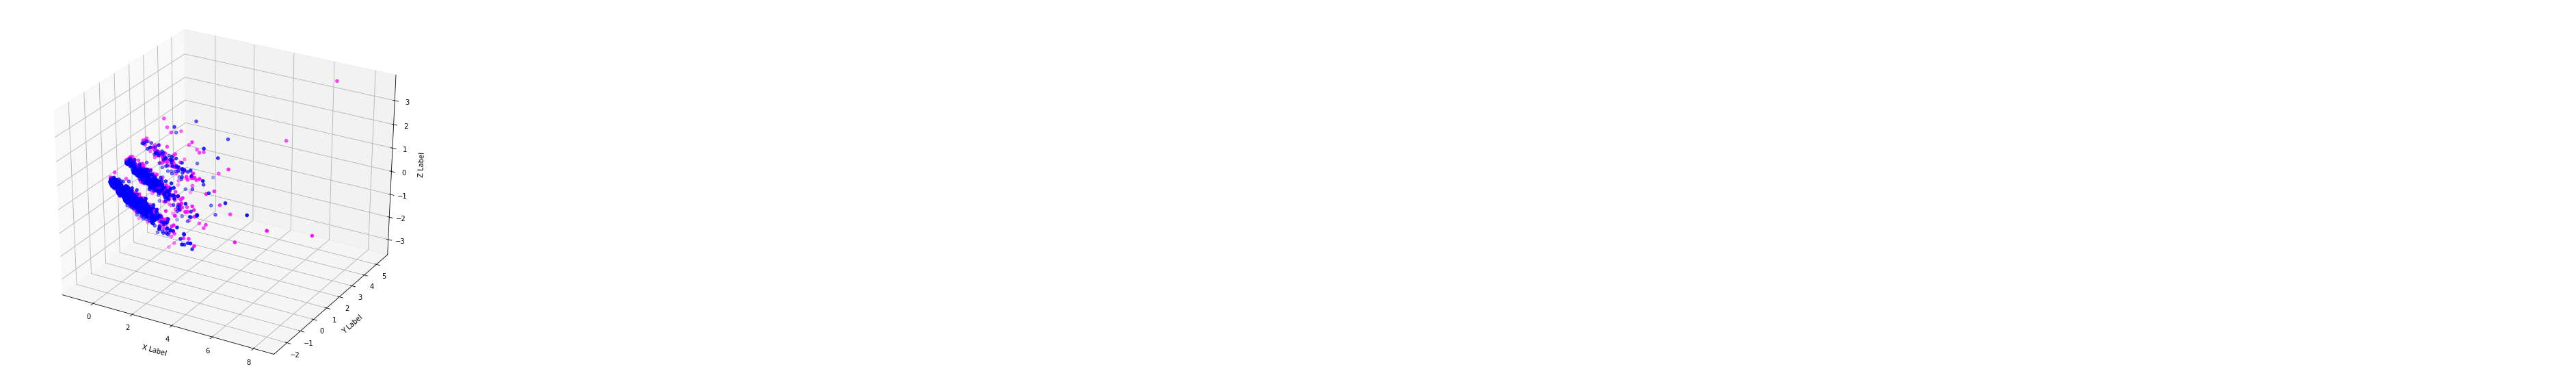

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['magenta', 'blue', 'cyan']

result_reduced_3 = PCA(n_components = 3).fit_transform(result_counts.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,2,2, projection='3d')

for c, scores in zip(col, score):
    xs = result_reduced_3[result['score'] == scores].T[0]
    ys = result_reduced_3[result['score'] == scores].T[1]
    zs = result_reduced_3[result['score'] == scores].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.25)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 5. Attribute Transformation/Aggregation

In [69]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,result_counts.shape[1]):
    term_frequencies.append(sum(result_counts[:,j].toarray()))

In [70]:
term_frequencies = np.asarray(result_counts.sum(axis = 0))[0]
term_frequencies[0]

1

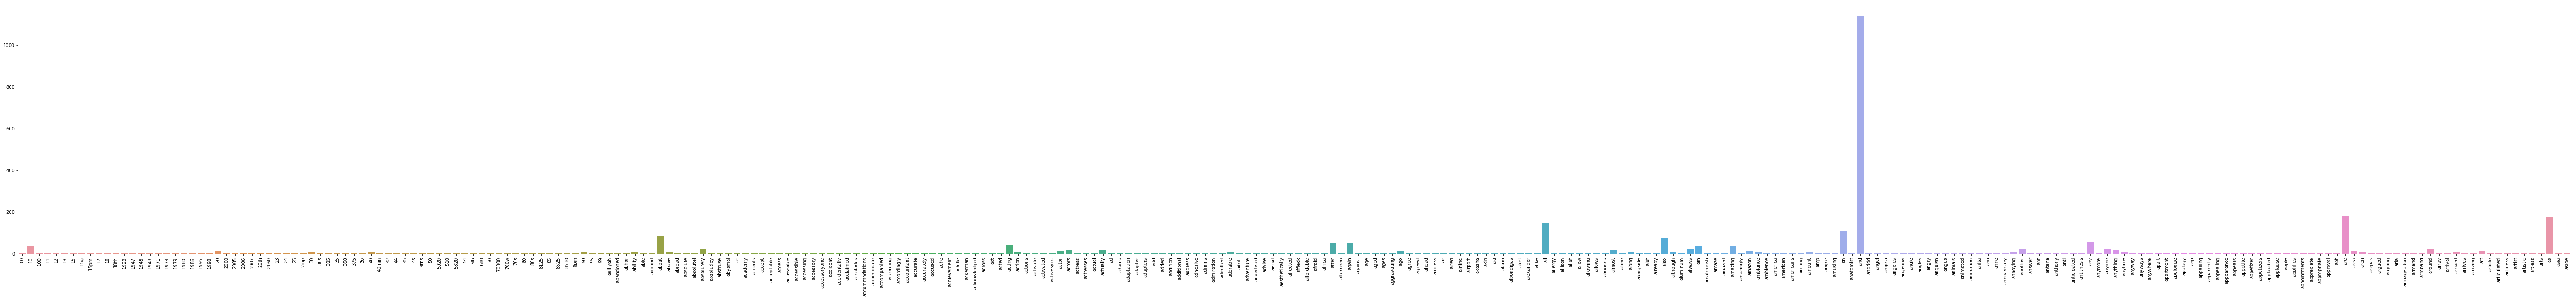

In [71]:
plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names()[:300], 
            y = term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [72]:
# Online Version
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# Plotly was implemented to make the plot become nicer interactive visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
           y = term_frequencies,
            marker = dict(color = '#EB89B5'))]

py.iplot(data, filename = 'jupyter-bar-score')

# Offline Version
# import plotly.plotly as py
# import plotly.graph_objs as go
# py.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected = True) 

# Plotly was implemented to make the plot become nicer interactive visualization
# data = [go.Bar(x = count_vect.get_feature_names(), 
#            y = term_frequencies,
#            marker = dict(color = '#EB89B5'))]
# py.offline.iplot(data, filename = 'jupyter-bar-score')

In [73]:
# The number of terms were reduced become 200 for a better visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
            y = term_frequencies[:200],
            marker = dict(color = '#EB89B5'))]
py.iplot(data, filename = 'jupyter-bar-reduce-score')
# py.offline.iplot(data, filename = 'jupyter-bar-reduce-score')

In [74]:
# The number of terms on x-axis were reduced become 200 and sorted by frequency instead of alphabetical order
bar = go.Bar(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = '#EB89B5'))
line = go.Scatter(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = 'magenta'))

data = [bar, line]
py.iplot(data, filename = 'jupyter-bar-longtail-score')
# py.offline.iplot(data, filename = 'jupyter-bar-longtail-score')

In [75]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

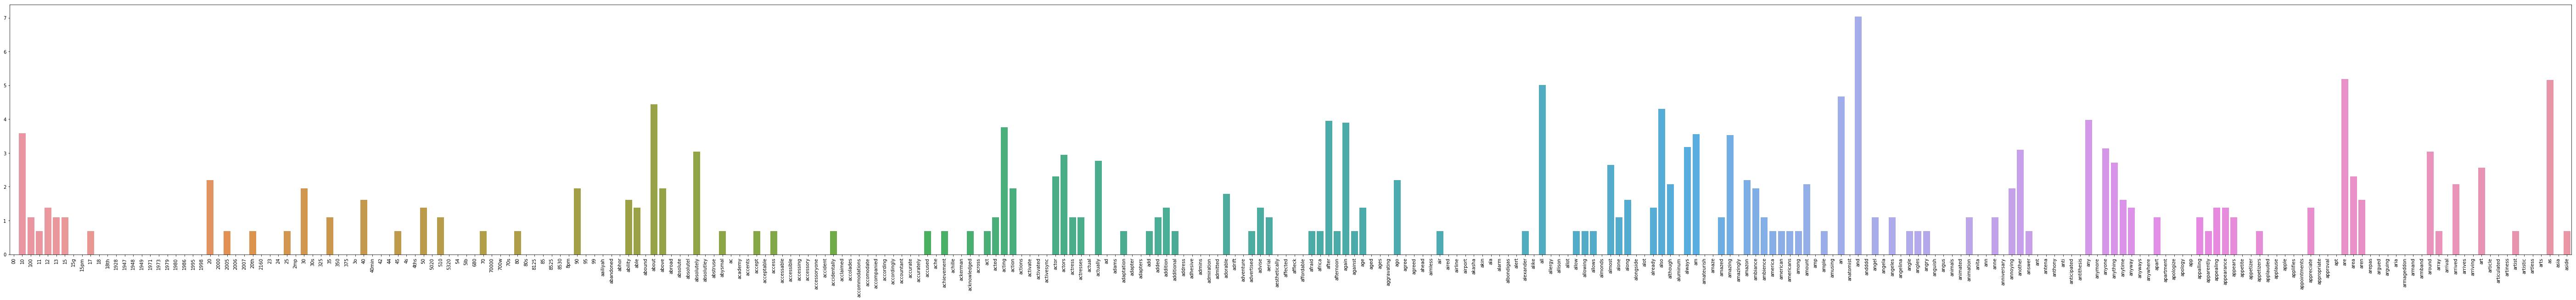

In [76]:
plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names()[:300],
                y = term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 6. Discretization and Binarization

In [77]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [78]:
mlb = preprocessing.LabelBinarizer()

In [79]:
mlb.fit(result.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [80]:
mlb.classes_

array([0, 1])

In [81]:
result['bin_score'] = mlb.transform(result['score']).tolist()

In [82]:
result[0:9]

,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Part 3: New Dataset & New Operations

## Generate new data visualizations

In [83]:
# Visualize by using Stacked Bar Chart, plotly
x = ["1 (Positive)","0 (Negative)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()

trace1 = go.Bar(
    x = x,
    y = result_sample_count,
    name = 'Sample Dataset Count',
    text = result_sample_count,
    textposition = 'auto',
    marker = dict(
        color = 'violet',
        line = dict(
            color = 'rgb(99, 10, 90)',
            width = 1),
        ),
    opacity = 0.6
)
trace2 = go.Bar(
    x = x,
    y = result_count,
    name = 'Whole Dataset Count',
    text = result_count,
    textposition = 'auto',
    marker = dict(
        color = 'deepskyblue',
        line = dict(
            color = 'rgb(58, 55, 198)',
            width = 1),
        ),
    opacity = 0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'jupyter-stacked-bar')
# py.offline.iplot(fig, filename = 'jupyter-stacked-bar')

In [84]:
# Visualize by using Bar Chart, plotly
x = ["1 (Positive)","0 (Negative)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()

trace1 = go.Bar(
    x = x,
    y = result_count,
    name = 'Whole Dataset Count',
    text = result_count,
    textposition = 'auto',
    marker = dict(
        color = 'violet',
        line = dict(
            color = 'rgb(99, 10, 90)',
            width = 1),
        ),
    opacity = 0.6
)
trace2 = go.Bar(
    x = x,
    y = result_sample_count,
    name = 'Sample Dataset Count',
    text = result_sample_count,
    textposition = 'auto',
    marker = dict(
        color = 'deepskyblue',
        line = dict(
            color = 'rgb(58, 55, 198)',
            width = 1),
        ),
    opacity = 0.6
)

data = [trace1,trace2]
py.iplot(data, filename = 'jupyter-grouped-bar-direct-labels')
# py.offline.iplot(data, filename = 'jupyter-grouped-bar-direct-labels')

In [85]:
# Visualize by using Donut Pie Chart, plotly
label = ["1 (Positive)","0 (Negative)"]
color = ["rgb(182, 66, 244)","rgb(224, 53, 210)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()
fig = {
  "data": [
    {
      # Whole Dataset
      "values": result_count,
      "labels": label,
      "text": result_count,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Whole Dataset count",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie",
      "marker": {"colors": color,
                "line": dict(color = 'rgb(252, 252, 252)', width = 1)}
    },
    {
      # Sample Dataset
      "values": result_sample_count,
      "labels": label,
      "text": result_sample_count,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Sample Dataset Count",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie",
      "marker": {"colors": color,
                "line": dict(color = 'rgb(252, 252, 252)', width = 1)}
    }],
  "layout": {
        "title":"Total Count for Whole Dataset and Sample Dataset",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Wholeset",
                "x": 0.185,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Sampleset",
                "x": 0.82,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename = 'jupyter-donut')
# py.offline.iplot(fig, filename = 'jupyter-donut')

## TF-IDF features from the tokens of each text

In [86]:
# Using TF-IDF to generate the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = result.sentence
vectorizer = TfidfVectorizer(norm = None)
vec = vectorizer.fit_transform(corpus)

# Check the matrix
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [87]:
# We can check the shape of this matrix by:
print(vec.shape)

(2983, 5155)


In [88]:
# We can obtain the feature names of the vectorizer, i.e., the terms
vectorizer.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

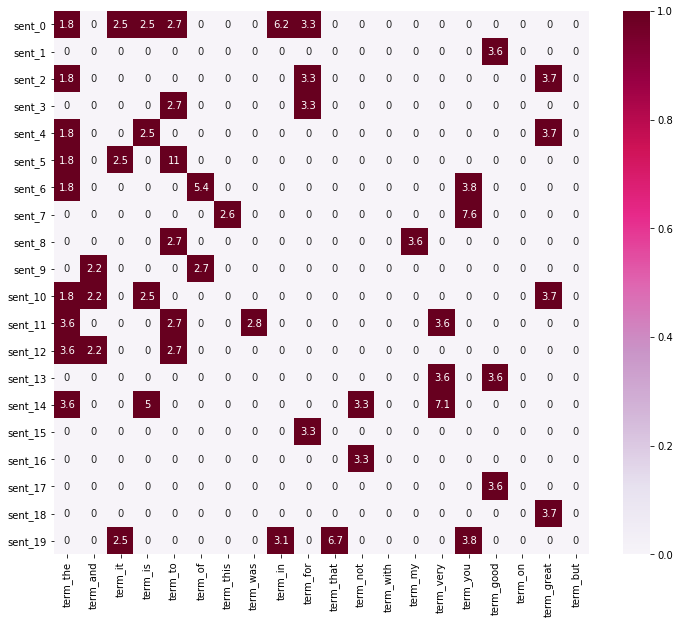

In [89]:
import seaborn as sns

# Mean the number of result_counts and sort them by getting only first 20 features
listsort = np.argsort(np.mean(vec, axis = 0).tolist()[0])[::-1][0:20]
docindex = slice(0,20)
plot_x = ["term_"+ str (vectorizer.get_feature_names()[i]) for i in listsort]
plot_y = ["sent_"+ str(i) for i in list(result.index)[docindex]]
plot_z = vec[docindex, listsort].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (12, 10))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

In [90]:
# Dimensionality Reduction for TF-IDF
result_reduced = PCA(n_components = 2).fit_transform(vec.toarray())
result_reduced.shape

(2983, 2)

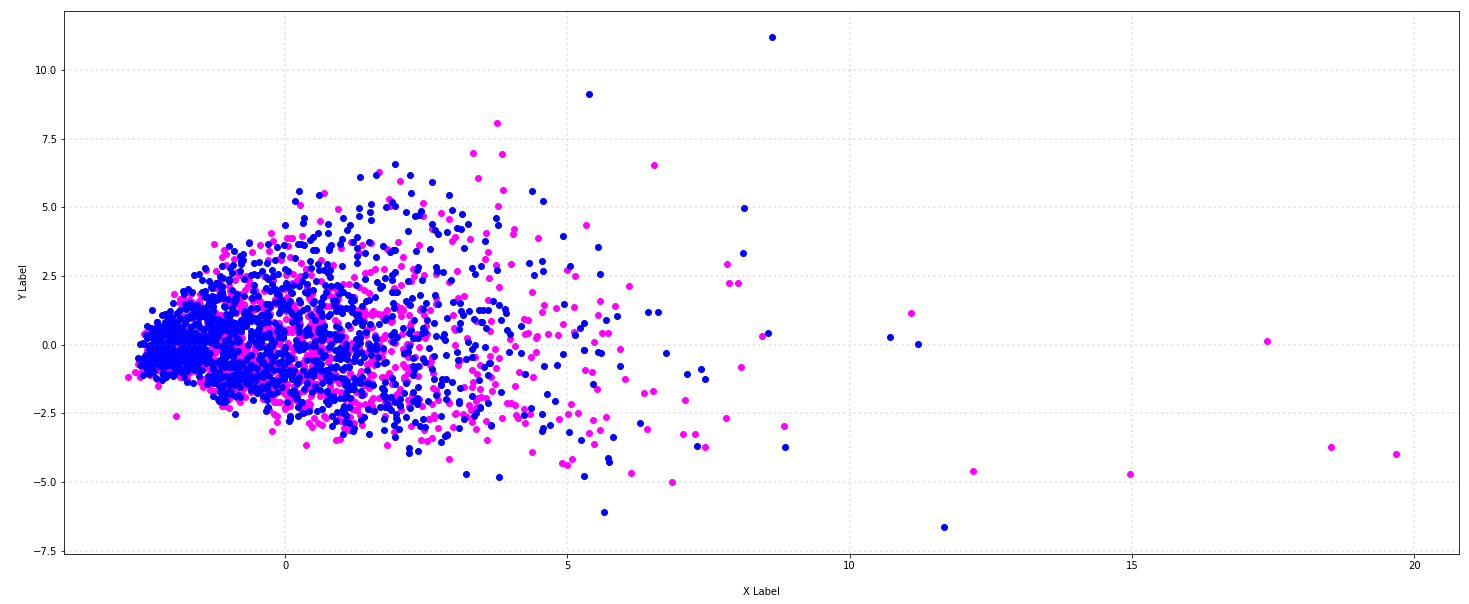

In [91]:
# TF-IDF, 2D
col = ['magenta', 'blue']
score = [1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scores in zip(col, score):
    xs = result_reduced[result['score'] == scores].T[0]
    ys = result_reduced[result['score'] == scores].T[1]
   
    ax.scatter(xs, ys, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

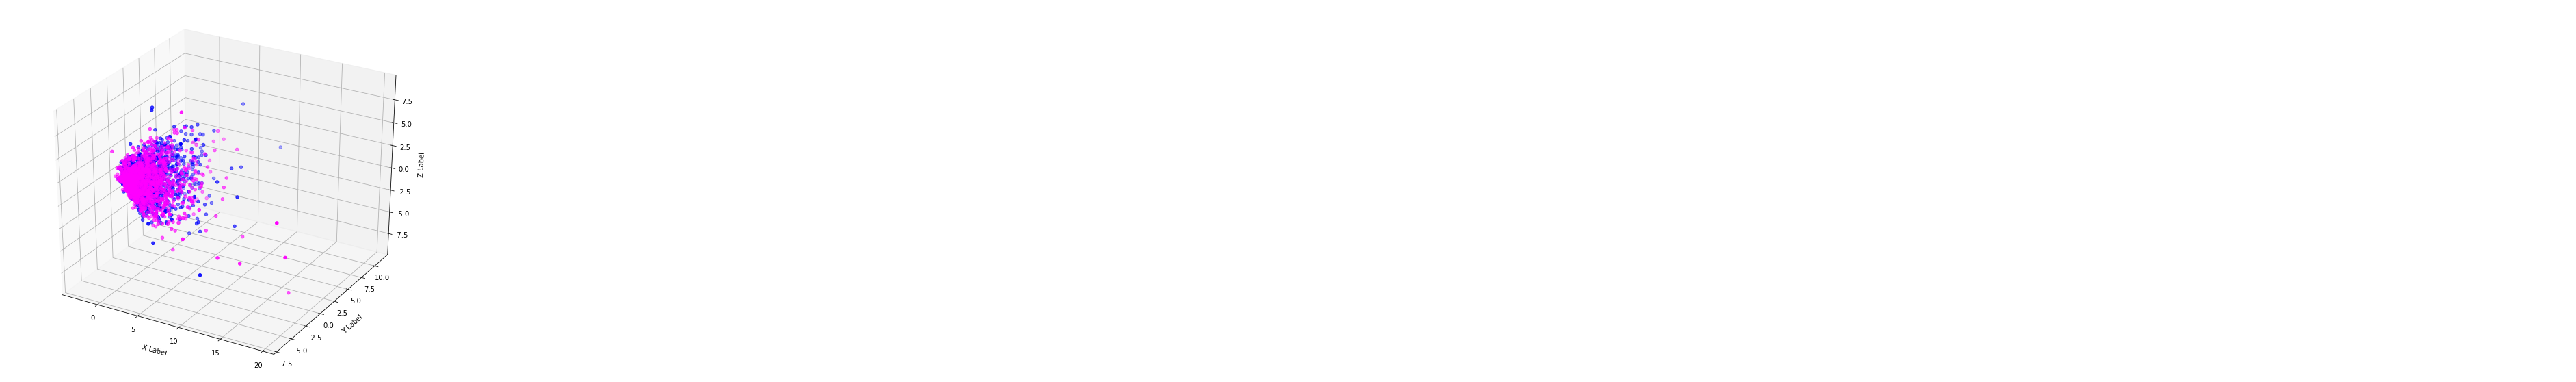

In [92]:
# TF-IDF, 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['magenta', 'blue', 'cyan']

result_reduced_3 = PCA(n_components = 3).fit_transform(vec.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,2,2, projection='3d')

for c, scores in zip(col, score):
    xs = result_reduced_3[result['score'] == scores].T[0]
    ys = result_reduced_3[result['score'] == scores].T[1]
    zs = result_reduced_3[result['score'] == scores].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.25)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## Compute the similarity using TF-IDF and word frequency features
Compute the similarity between random sentences and report results. 

### Euclidean distance

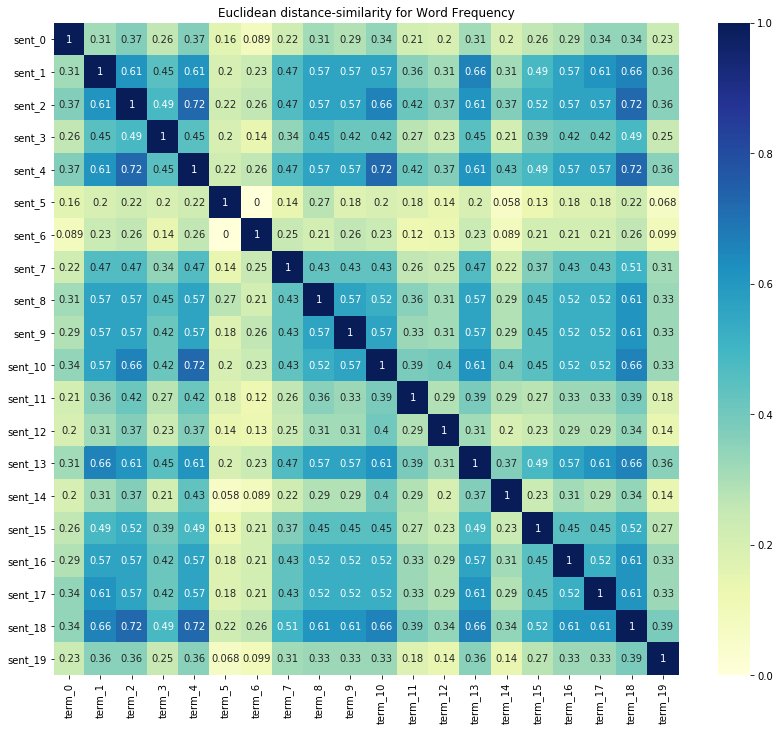

In [93]:
# Euclidean distance for Word Frequency
from sklearn.metrics.pairwise import euclidean_distances

euclidean_metrics = euclidean_distances(result_counts)
euclidean_metrics
# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = euclidean_metrics[0:20, 0:20]

# convert distance into similarity
maxv = plot_z.max() # choose the max value of the dataset
norm = np.around((1 - np.true_divide(plot_z, maxv)), decimals = 3)

import seaborn as sns
df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Euclidean distance-similarity for Word Frequency')
ax = sns.heatmap(df_todraw,
                cmap = "YlGnBu",
                vmin = 0, vmax = 1, annot = True)

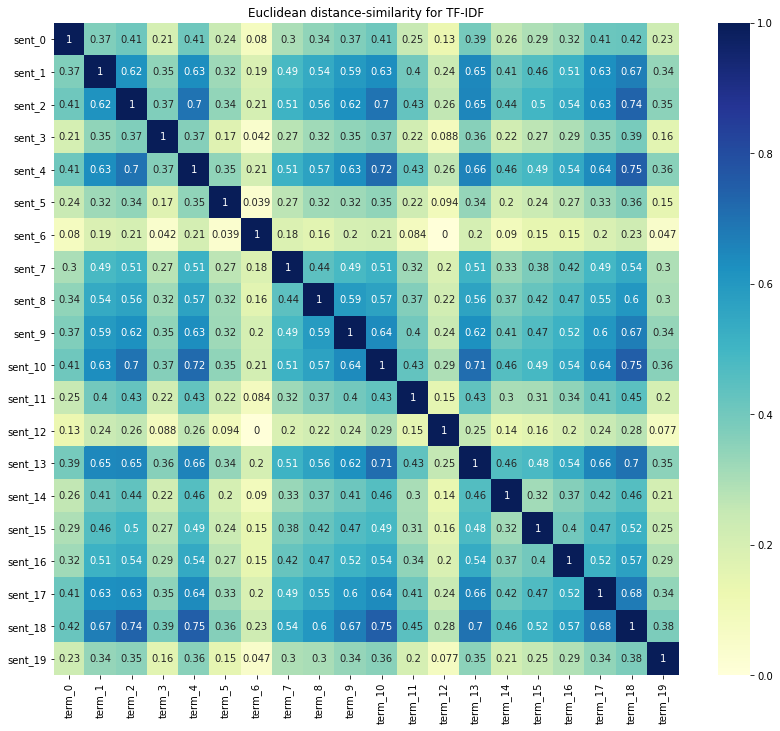

In [94]:
# Euclidean distance for TF-IDF
from sklearn.metrics.pairwise import euclidean_distances

euclidean_metrics_vec = euclidean_distances(vec)
euclidean_metrics_vec

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = euclidean_metrics_vec[0:20, 0:20]

# convert distance into similarity
maxv = plot_z.max() # choose the max value of the dataset
norm = np.around((1 - np.true_divide(plot_z, maxv)), decimals = 3)
maxv

import seaborn as sns
df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Euclidean distance-similarity for TF-IDF')
ax = sns.heatmap(df_todraw,
                cmap = "YlGnBu",
                vmin = 0, vmax = 1, annot = True)

In [95]:
# By using Euclidean Distance, it will first normalize become similarity to ensure the values were between 0 and 1.
# The similarity for TF-IDF is slightly higher compared to Word Frequency.

### Manhattan distance

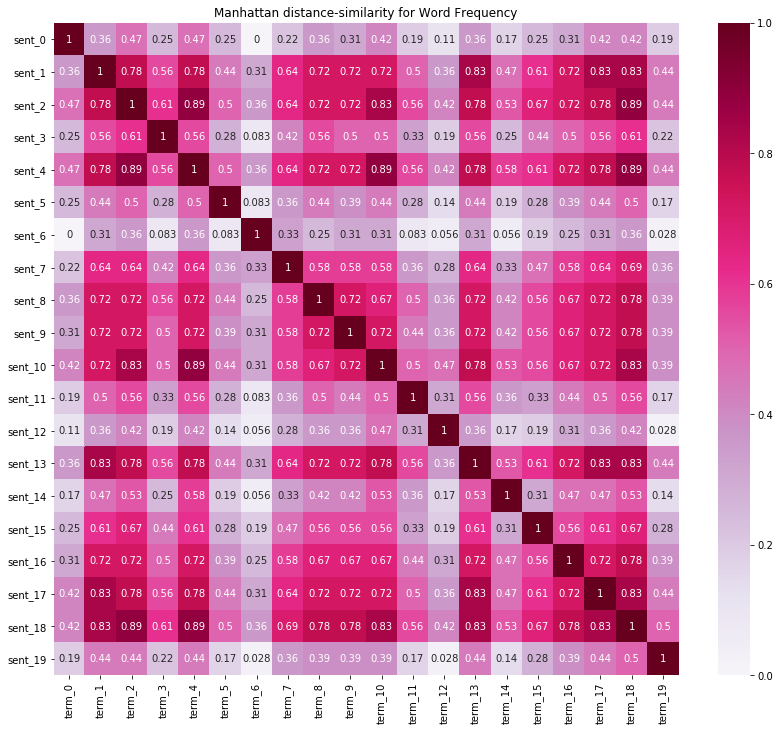

In [96]:
# Manhattan distance for Word Frequency
from sklearn.metrics.pairwise import manhattan_distances

manhattan_metrics = manhattan_distances(result_counts)
manhattan_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = manhattan_metrics[0:20, 0:20]

# convert distance into similarity
maxv = plot_z.max() # choose the max value of the dataset
norm = np.around((1 - np.true_divide(plot_z, maxv)), decimals = 3)

import seaborn as sns
df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Manhattan distance-similarity for Word Frequency')
ax = sns.heatmap(df_todraw,
                cmap = "PuRd",
                vmin = 0, vmax = 1, annot = True)

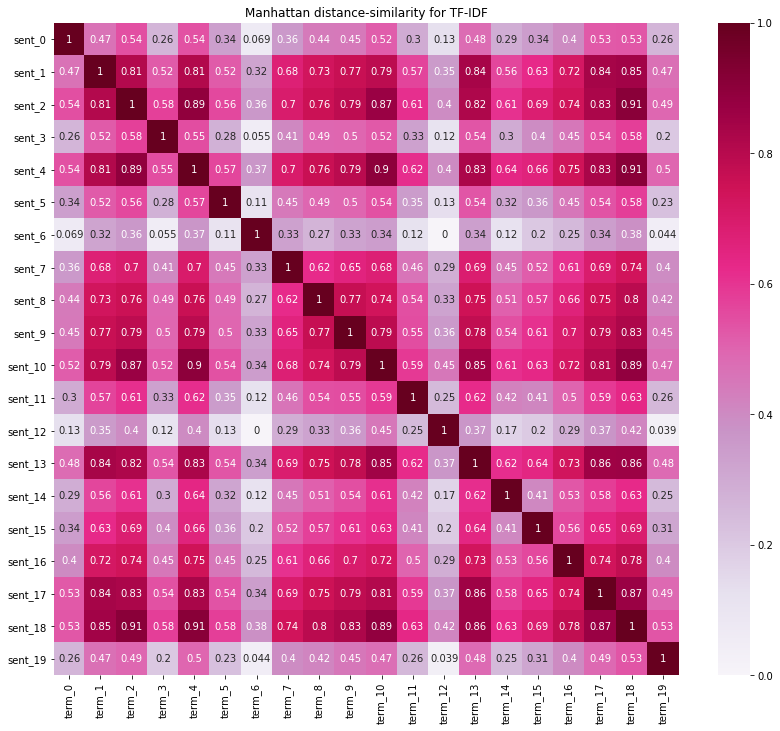

In [97]:
# Manhattan distance for TF-IDF
from sklearn.metrics.pairwise import manhattan_distances

manhattan_metrics_vec = manhattan_distances(vec)
manhattan_metrics_vec

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = manhattan_metrics_vec[0:20, 0:20]

# convert distance into similarity
maxv = plot_z.max() # choose the max value of the dataset
norm = np.around((1 - np.true_divide(plot_z, maxv)), decimals = 3)

import seaborn as sns
df_todraw = pd.DataFrame(norm, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Manhattan distance-similarity for TF-IDF')
ax = sns.heatmap(df_todraw,
                cmap = "PuRd",
                vmin = 0, vmax = 1, annot = True)

In [98]:
# By using Manhattan Distance, it will first normalize become similarity to ensure the values were between 0 and 1.
# The similarity for TF-IDF is slightly higher compared to Word Frequency.

### Cosine similarity

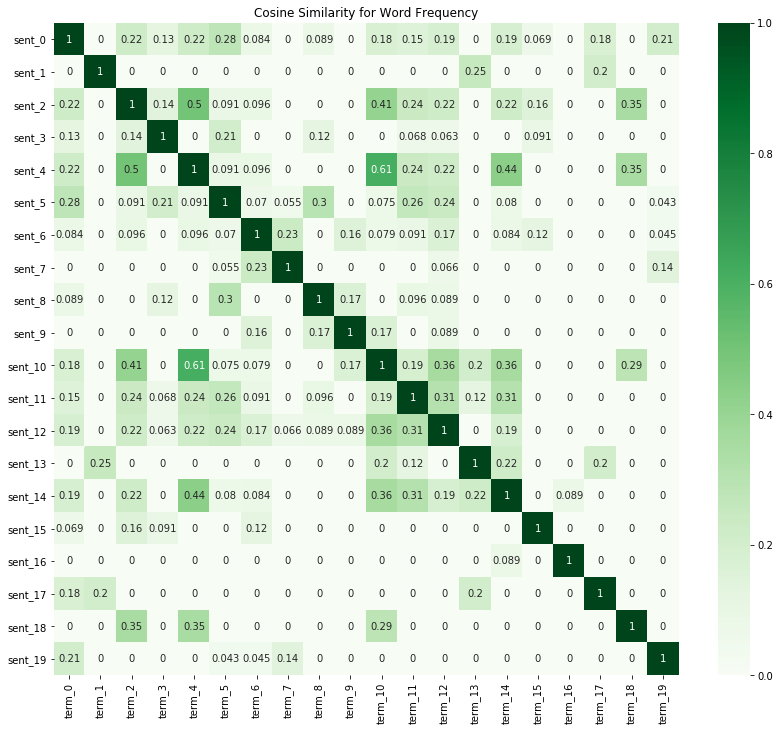

In [99]:
# Cosine similarity for Word Frequency
from sklearn.metrics.pairwise import cosine_similarity

cosine_metrics = cosine_similarity(result_counts)
cosine_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = cosine_metrics[0:20, 0:20]

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Cosine Similarity for Word Frequency')
ax = sns.heatmap(df_todraw,
                 cmap = "Greens",
                 vmin = 0, vmax = 1, annot = True)

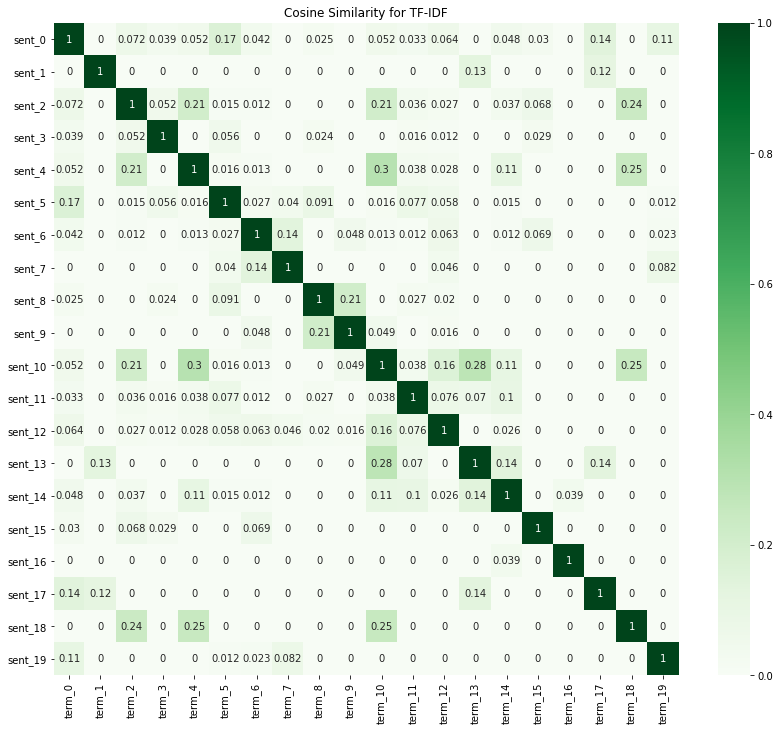

In [100]:
# Cosine similarity for TF-IDF
from sklearn.metrics.pairwise import cosine_similarity

cosine_metrics_vec = cosine_similarity(vec)
cosine_metrics_vec

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = cosine_metrics_vec[0:20, 0:20]
maxv

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Cosine Similarity for TF-IDF')
ax = sns.heatmap(df_todraw,
                 cmap = "Greens",
                 vmin = 0, vmax = 1, annot = True)

In [101]:
# By using Cosine Similarity, the similarity for Word Frequency is slightly higher compared to TF-IDF.

## Naive Bayes Classifier 
Automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Report the classification accuracy of both your models.

In [102]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

### BernoulliNB

In [103]:
# BernoulliNB, Word Frequency
# split into train and test sets
X_B = result_counts.toarray()
Y_B = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size = 0.25)
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)
acc_bnbw = cross_val_score(bnb, X_B, Y_B, scoring = 'accuracy', cv = 10).mean()
y_pred = bnb.predict(X_test)
print('Accuracy for BernoulliNB (Word Frequency): {:.3f}'.format(acc_bnbw))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for BernoulliNB (Word Frequency): 0.820


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       367
           1       0.86      0.81      0.84       379

   micro avg       0.84      0.84      0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



In [104]:
# BernoulliNB, TF-IDF
# split into train and test sets
X_BV = vec.toarray()
Y_BV = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_BV, Y_BV, test_size = 0.25)
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)
acc_bnbt = cross_val_score(bnb, X_BV, Y_BV, scoring = 'accuracy', cv = 10).mean()
y_pred = bnb.predict(X_test)
print('Accuracy for BernoulliNB (TF-IDF): {:.3f}'.format(acc_bnbt))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for BernoulliNB (TF-IDF): 0.820


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       394
           1       0.83      0.81      0.82       352

   micro avg       0.83      0.83      0.83       746
   macro avg       0.83      0.83      0.83       746
weighted avg       0.83      0.83      0.83       746



### MultinomialNB

In [105]:
# MultinomialNB, Word Frequency
# split into train and test sets
X_M = result_counts.toarray()
Y_M = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_M, Y_M, test_size = 0.25)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)
acc_mnbw = cross_val_score(mnb, X_M, Y_M, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy for MultinomialNB (Word Frequency): {:.3f}'.format(acc_mnbw))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for MultinomialNB (Word Frequency): 0.819


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       388
           1       0.81      0.83      0.82       358

   micro avg       0.82      0.82      0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



In [106]:
# MultinomialNB, TF-IDF
# split into train and test sets
X_MV = vec.toarray()
Y_MV = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_MV, Y_MV, test_size = 0.25)
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)
acc_mnbt = cross_val_score(mnb, X_MV, Y_MV, scoring = 'accuracy', cv = 10).mean()
y_pred = mnb.predict(X_test)
print('Accuracy for MultinomialNB (TF-IDF): {:.3f}'.format(acc_mnbt))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for MultinomialNB (TF-IDF): 0.781


              precision    recall  f1-score   support

           0       0.80      0.75      0.77       381
           1       0.76      0.80      0.78       365

   micro avg       0.78      0.78      0.78       746
   macro avg       0.78      0.78      0.78       746
weighted avg       0.78      0.78      0.78       746



### GaussianNB

In [107]:
# GaussianNB, Word Frequency
# split into train and test sets
X_G = result_counts.toarray()
Y_G = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_G, Y_G, test_size = 0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
acc_gnbw = cross_val_score(gnb, X_G, Y_G, scoring = 'accuracy', cv = 10).mean()
y_pred = gnb.predict(X_test)
print('Accuracy for GaussianNB (Word Frequency): {:.3f}'.format(acc_gnbw))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for GaussianNB (Word Frequency): 0.667


              precision    recall  f1-score   support

           0       0.62      0.84      0.72       386
           1       0.72      0.46      0.56       360

   micro avg       0.66      0.66      0.66       746
   macro avg       0.67      0.65      0.64       746
weighted avg       0.67      0.66      0.64       746



In [108]:
# GaussianNB, TF-IDF
# split into train and test sets
X_GV = vec.toarray()
Y_GV = result['score'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_GV, Y_GV, test_size = 0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
acc_gnbt = cross_val_score(gnb, X_GV, Y_GV, scoring = 'accuracy', cv = 10).mean()
y_pred = gnb.predict(X_test)
print('Accuracy for GaussianNB (TF-IDF): {:.3f}'.format(acc_gnbt))
print('\n')
# Classification Report
print(classification_report(Y_test, y_pred))

Accuracy for GaussianNB (TF-IDF): 0.636


              precision    recall  f1-score   support

           0       0.66      0.78      0.71       369
           1       0.74      0.60      0.66       377

   micro avg       0.69      0.69      0.69       746
   macro avg       0.70      0.69      0.69       746
weighted avg       0.70      0.69      0.69       746



### Comparison between GaussianNB, MultinomialNB, BernoulliNB

In [109]:
print('Comparison for Word Frequency: ')
print('Accuracy for BernoulliNB (Word Frequency): {:.3f}'.format(acc_bnbw))
print('Accuracy for MultinomialNB (Word Frequency): {:.3f}'.format(acc_mnbw))
print('Accuracy for GaussianNB (Word Frequency): {:.3f}'.format(acc_gnbw))
print('\n')
print('Comparison for TF-IDF: ')
print('Accuracy for BernoulliNB (TF-IDF): {:.3f}'.format(acc_bnbt))
print('Accuracy for MultinomialNB (TF-IDF): {:.3f}'.format(acc_mnbt))
print('Accuracy for GaussianNB (TF-IDF): {:.3f}'.format(acc_gnbt))

Comparison for Word Frequency: 
Accuracy for BernoulliNB (Word Frequency): 0.820
Accuracy for MultinomialNB (Word Frequency): 0.819
Accuracy for GaussianNB (Word Frequency): 0.667


Comparison for TF-IDF: 
Accuracy for BernoulliNB (TF-IDF): 0.820
Accuracy for MultinomialNB (TF-IDF): 0.781
Accuracy for GaussianNB (TF-IDF): 0.636


### ROC Curve

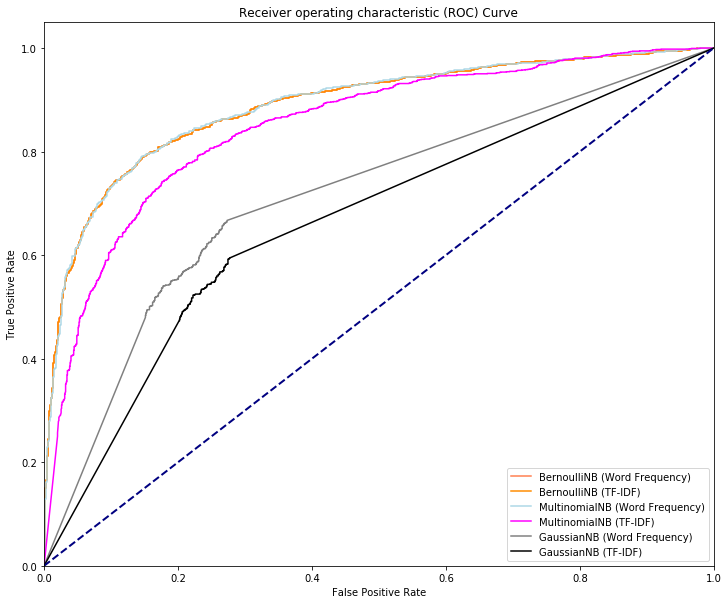

In [110]:
y_pred_b = cross_val_predict(bnb, X_B, Y_B, cv = 10, method = 'predict_proba')
y_pred_bnb = cross_val_predict(bnb, X_BV, Y_BV, cv = 10, method = 'predict_proba')
y_pred_m = cross_val_predict(mnb, X_M, Y_M, cv = 10, method = 'predict_proba')
y_pred_mnb = cross_val_predict(mnb, X_MV, Y_MV, cv = 10, method = 'predict_proba')
y_pred_g = cross_val_predict(gnb, X_G, Y_G, cv = 10, method = 'predict_proba')
y_pred_gnb = cross_val_predict(gnb, X_GV, Y_GV, cv = 10, method = 'predict_proba')

plt.figure(figsize = (12, 10))
lw = 2

# BernoulliNB (Word Frequency)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(Y_B, y_pred_b[:, 1])
roc_auc_b = auc(fpr_bnb, tpr_bnb)
plt.plot(fpr_bnb, tpr_bnb, color = 'coral', label = 'BernoulliNB (Word Frequency)')

# BernoulliNB (TF-IDF)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(Y_BV, y_pred_bnb[:, 1])
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)
plt.plot(fpr_bnb, tpr_bnb, color = 'darkorange', label = 'BernoulliNB (TF-IDF)')

# MultinomialNB (Word Frequency)
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(Y_M, y_pred_m[:, 1])
roc_auc_m = auc(fpr_mnb, tpr_mnb)
plt.plot(fpr_mnb, tpr_mnb, color = 'lightblue', label = 'MultinomialNB (Word Frequency)')

# MultinomialNB (TF-IDF)
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(Y_MV, y_pred_mnb[:, 1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)
plt.plot(fpr_mnb, tpr_mnb, color = 'magenta', label = 'MultinomialNB (TF-IDF)')

# GaussianNB (Word Frequency)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_G, y_pred_g[:, 1])
roc_auc_g = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, color = 'grey', label = 'GaussianNB (Word Frequency)')

# GaussianNB (TF-IDF)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_GV, y_pred_gnb[:, 1])
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, color = 'black', label = 'GaussianNB (TF-IDF)')

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()

From the ROC Curve above, it shows the TruePositive Rate and False Positive Rate based on the accuracy of three different types of classifiers. As we can see, BernoulliNB are most similar campared to the others between the Word Frequency and TF-IDF. Besides, GaussianNB performed the least accuracy as compared to the other two classifiers.